# **Abstract
This project focuses on analyzing the OrdersandDeliveries dataset provided by Boeing, which contains data spanning from 1955 to 2022. The main objective of this project is to perform exploratory data analysis (EDA) to identify patterns and trends within the dataset. By examining historical data, the project aims to uncover potential opportunities based on past trends.

In [ ]:
#Importing libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**About the dataset** Full data about Boeing's airplanes orders and deliveries from 1955-2022
Contains full information about the customer, operating country, model's name , delivery year etc.

In [4]:
df = pd.read_csv("OrdersandDeliveries.csv")

In [5]:
df.head()

,Country,Customer Name,Delivery Year,Engine,Model Series,Order Month,Order Year,Region,Delivery Total,Order Total,Unfilled Orders
0,Afghanistan,Ariana Afghan Airlines,1968,PW,727,Mar,1968,Central Asia,1,1,NaN
1,Afghanistan,Ariana Afghan Airlines,1970,PW,727,Apr,1969,Central Asia,1,1,NaN
2,Afghanistan,Ariana Afghan Airlines,1979,GE,DC-10,Sep,1978,Central Asia,1,1,NaN
3,Afghanistan,Ariana Afghan Airlines,NaN,CF,737-700,Nov,2005,Central Asia,0,4,NaN
4,Algeria,Air Algerie,1974,PW,727,Jan,1974,Africa,1,1,NaN


# **Insight 1**: Total number of deliveries per country
This will give information about the total deliveries per country, which is useful to identify the country giving maximum business to Boeing

In [6]:
deliveries_per_country = df.groupby('Country')['Delivery Total'].sum()
print(deliveries_per_country)


Country
Afghanistan                                1110
Algeria        11122621121232114332312211334234
All                                      24,025
Angola                        11111211112132112
Argentina      21212111333211311603120233000310
                             ...               
Venezuela                   1162101211100011212
Vietnam                                00022431
Yemen                                    211004
Zambia                                     0011
Zimbabwe                                   2111
Name: Delivery Total, Length: 132, dtype: object


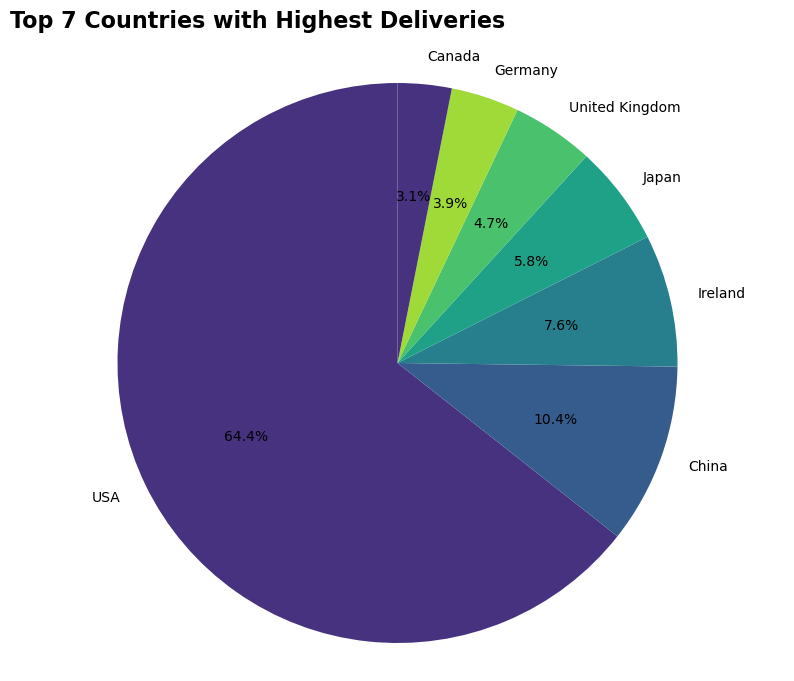

In [25]:
# Remove non-numeric values and convert 'Delivery Total' to numeric type
df['Delivery Total'] = pd.to_numeric(df['Delivery Total'], errors='coerce')

# Remove rows with NaN values in 'Delivery Total'
df = df.dropna(subset=['Delivery Total'])

# Exclude the country "All" from the dataframe
df = df[df['Country'] != 'All']

# Group the dataframe by 'Country' and sum the 'Delivery Total'
df_grouped = df.groupby('Country')['Delivery Total'].sum().reset_index()

# Sort the dataframe by 'Delivery Total' in descending order
df_grouped = df_grouped.sort_values(by='Delivery Total', ascending=False)

# Select the top 7 countries with the highest number of deliveries
top_countries = df_grouped['Country'].head(7)
top_deliveries = df_grouped['Delivery Total'].head(7)

# Plotting the pie chart for the top 7 countries
plt.figure(figsize=(10, 8))
plt.pie(top_deliveries, labels=top_countries, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.axis('equal')
plt.title('Top 7 Countries with Highest Deliveries', fontweight='bold', fontsize=16, loc='left', pad=20)
plt.show()


# **Interpretation**
Above graph shows the top 7 countries and we can see the maximum business is from USA, which is significantly high from the rest top 6 countries.

In [23]:
print(top_countries)

2610    Ireland
2611    Ireland
2609    Ireland
8497        USA
8720        USA
6121        USA
2011    Germany
Name: Country, dtype: object


In [20]:
print(top_deliveries)

9072    24025.0
2610       50.0
2609       50.0
2611       50.0
8497       38.0
8720       34.0
6121       32.0
Name: Delivery Total, dtype: float64


In [21]:
df['Country']

9072            All
2610        Ireland
2609        Ireland
2611        Ireland
8497            USA
           ...     
3571     Mozambique
3580    Netherlands
7209            USA
7208            USA
4536    South Korea
Name: Country, Length: 9073, dtype: object

**#Insight 2:** Most frequently ordered engine
This insight to find out the engine ordrered maximum times, which can help to identify to keep the supply as the demand is high

In [26]:
frequent_engine = df['Engine'].value_counts().idxmax()
print(frequent_engine)


PW


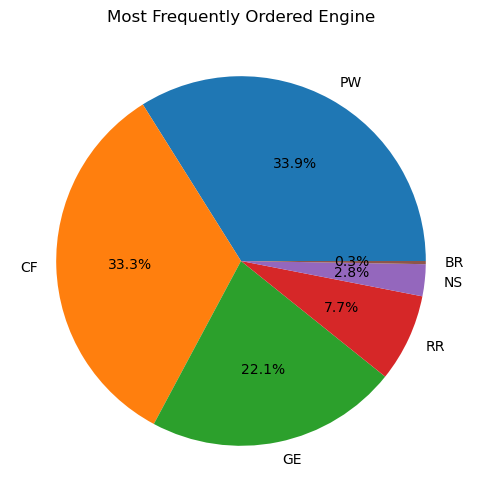

In [27]:
# Plotting the most frequently ordered engine
plt.figure(figsize=(6, 6))
plt.pie(df['Engine'].value_counts(), labels=df['Engine'].value_counts().index, autopct='%1.1f%%')
plt.title('Most Frequently Ordered Engine')
plt.show()


# **Interpretation:**
Although the PW is the engine in high demand, however CF, GE engines are also closey matched the demand for PW. Therefore, keeping these engines in stock would be a right strategy, as the demand is high for these engines.

# **Insight 3:** Average order total per region
This insight will inform about the regions with high number of orders

In [46]:
df['Order Total'] = pd.to_numeric(df['Order Total'])
total_order_total = df['Order Total'].sum()
print(total_order_total)

33587


In [41]:
non_numeric_values = []

for value in df['Order Total']:
    if not pd.to_numeric(value, errors='coerce') and value != 0:
        non_numeric_values.append(value)

print(non_numeric_values)


[]


In [42]:
average_order_total_per_region = df.groupby('Region')['Order Total'].mean()
print(average_order_total_per_region)


Region
Africa                        2.013661
Caribbean                     2.846154
Central America and Mexico    2.816794
Central Asia                  1.639344
East Asia                     2.982558
Europe                        3.251742
Middle East                   4.692105
North America                 4.174561
Oceania                       2.721429
South America                 3.174672
South Asia                    5.801471
Southeast Asia                3.954631
Unidentified                  9.450382
Name: Order Total, dtype: float64


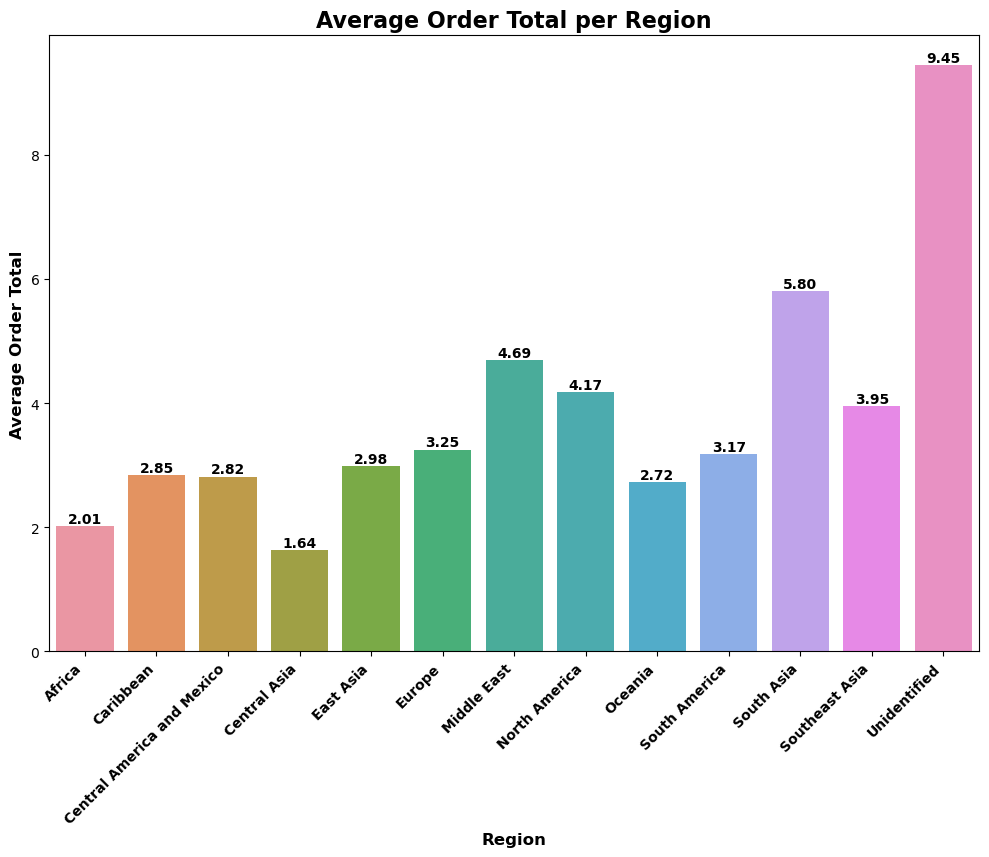

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas Series called 'average_order_total_per_region' containing the average order total per region

# Increase the figure size for better visibility
plt.figure(figsize=(12, 8))

# Plot the bar chart
ax = sns.barplot(x=average_order_total_per_region.index, y=average_order_total_per_region.values)

# Set x-axis label rotation for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='bold')

# Set font style and size for title, x-axis label, and y-axis label
plt.title('Average Order Total per Region', fontweight='bold', fontsize=16)
plt.xlabel('Region', fontweight='bold', fontsize=12)
plt.ylabel('Average Order Total', fontweight='bold', fontsize=12)

# Label the bars
for i, value in enumerate(average_order_total_per_region.values):
    plt.annotate(f'{value:.2f}', (i, value), ha='center', va='bottom', fontweight='bold')

# Display the plot
plt.show()


# **Interpretation:**
Above bar plot shows the Regions with the average orders, we can see there is some data is missing there is a region but name is not captured has the highest orders after that there is South Asia and Middle East

# **Insight 4:** Customer with maximum orders 

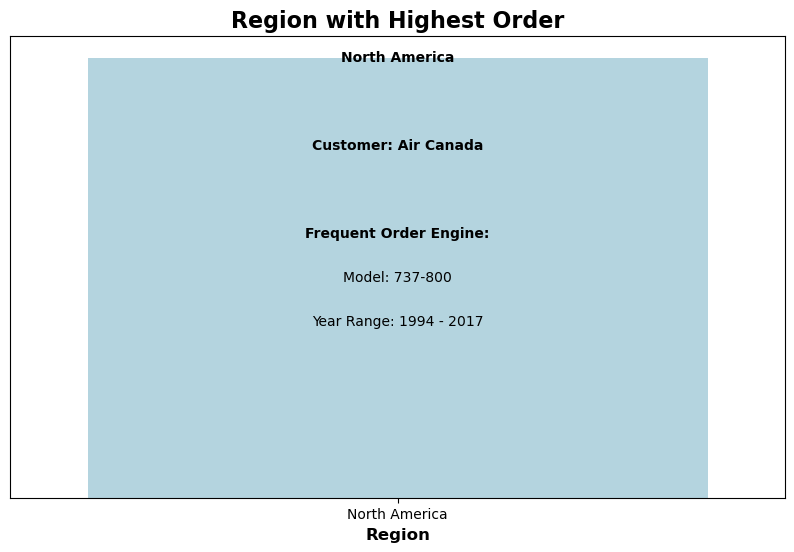

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the CSV file
df = pd.read_csv("OrdersandDeliveries.csv")

# Calculate the region with the highest order
highest_order_region = df['Region'].value_counts().idxmax()

# Get the customer name associated with the highest order
customer_name = df.loc[df['Region'] == highest_order_region, 'Customer Name'].values[0]

# Calculate the most frequent order engine
frequent_engine_model = df['Model Series'].value_counts().idxmax()

# Calculate the range of years for the most frequent order engine
year_range = f"{df.loc[df['Model Series'] == frequent_engine_model, 'Order Year'].min()} - {df.loc[df['Model Series'] == frequent_engine_model, 'Order Year'].max()}"

# Create a bar plot with a single bar for the highest order region
plt.figure(figsize=(10, 6))
sns.barplot(x=[highest_order_region], y=[1], color='lightblue')

# Add text annotation for the highest order region
plt.text(x=0, y=1, s=highest_order_region, ha='center', va='center', fontweight='bold')

# Set font style and size for title and labels
plt.title('Region with Highest Order', fontweight='bold', fontsize=16)
plt.xlabel('Region', fontweight='bold', fontsize=12)
plt.ylabel('')

# Add text annotation for customer name
plt.text(x=0, y=0.8, s='Customer: ' + customer_name, ha='center', va='center', fontweight='bold')

# Add text annotation for frequent order engine
plt.text(x=0, y=0.6, s='Frequent Order Engine:', ha='center', va='center', fontweight='bold')
plt.text(x=0, y=0.5, s='Model: ' + frequent_engine_model, ha='center', va='center')
plt.text(x=0, y=0.4, s='Year Range: ' + year_range, ha='center', va='center')

# Remove y-axis ticks and labels
plt.yticks([])

# Display the plot
plt.show()


# Interpretation: 
This shows the region with highest order placed by which customer. It shows the South Asia as a region has the highest number of orders, however the customer with maximum orders is Air Canada. This can help boeing to strategise their marketing strategies. 

# ** Insight 4:** Yearly Trend of Orders by Region

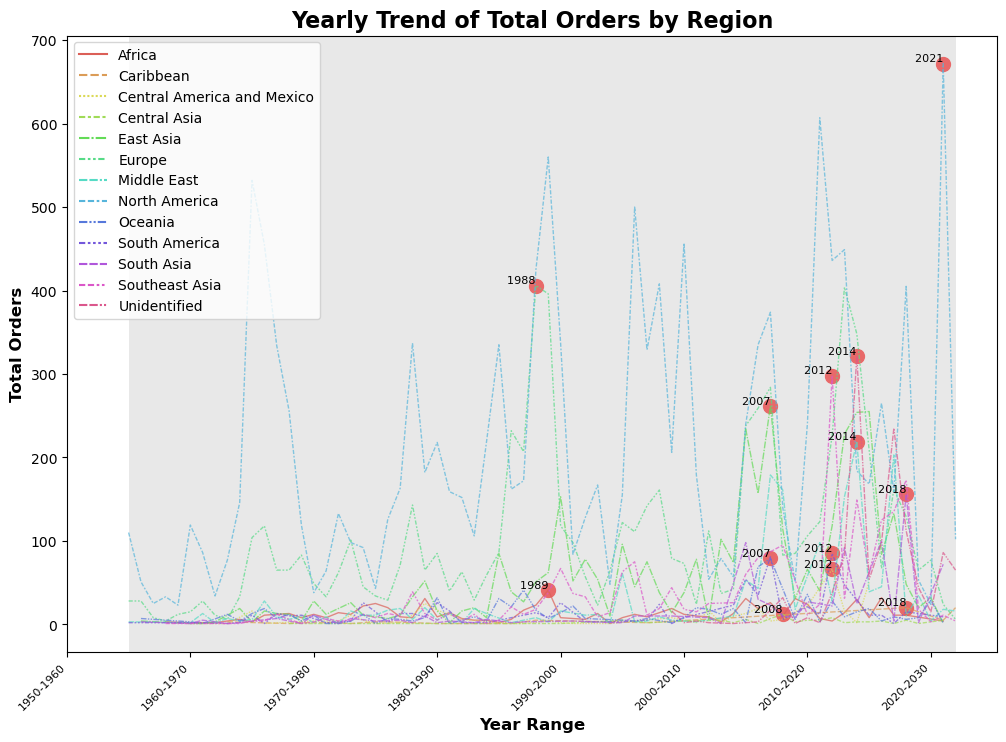

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Read the data from the CSV file
df = pd.read_csv("OrdersandDeliveries.csv")

# Convert the 'Order Total' column to numeric format
df['Order Total'] = pd.to_numeric(df['Order Total'], errors='coerce')

# Remove rows with 'All' in the Region column
df = df[df['Region'] != 'All']

# Convert the 'Order Year' column to numeric format
df['Order Year'] = pd.to_numeric(df['Order Year'], errors='coerce')

# Group the data by region and order year, and calculate the total orders for each combination
region_yearly_orders = df.groupby(['Region', 'Order Year'])['Order Total'].sum().reset_index()

# Find the year with the highest order for each region
max_order_year_per_region = region_yearly_orders.groupby('Region')['Order Total'].idxmax()
max_order_years = region_yearly_orders.loc[max_order_year_per_region, 'Order Year']

# Set the figure size
plt.figure(figsize=(12, 8))

# Define a distinct color palette for each region
color_palette = sns.color_palette("hls", len(region_yearly_orders['Region'].unique()))

# Plot a line plot for each region
sns.lineplot(data=region_yearly_orders, x='Order Year', y='Order Total', hue='Region', palette=color_palette, style='Region', linewidth=1, alpha=0.7)

# Highlight the year with the highest order for each region
for year, region in zip(max_order_years, region_yearly_orders['Region'].unique()):
    plt.scatter(year, region_yearly_orders.loc[(region_yearly_orders['Region'] == region) & (region_yearly_orders['Order Year'] == year), 'Order Total'], color='red', s=100)
    plt.text(year, region_yearly_orders.loc[(region_yearly_orders['Region'] == region) & (region_yearly_orders['Order Year'] == year), 'Order Total'], f"  {year}", ha='right', va='bottom', fontsize=8)

# Set the title and labels
plt.title('Yearly Trend of Total Orders by Region', fontweight='bold', fontsize=16)
plt.xlabel('Year Range', fontweight='bold', fontsize=12)
plt.ylabel('Total Orders', fontweight='bold', fontsize=12)

# Set the legend position and size
plt.legend(loc='upper left', fontsize='medium')

# Rotate and align the x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust the font size of x-axis labels
plt.tick_params(axis='x', labelsize=8)

# Set the background color for the non-highlighted years
ax = plt.gca()
ax.axvspan(min(region_yearly_orders['Order Year']), max(region_yearly_orders['Order Year']), facecolor='lightgray', alpha=0.5)

# Get the current year
current_year = pd.Timestamp.now().year

# Determine the start and end years for each label
start_year = math.floor(min(region_yearly_orders['Order Year']) / 10) * 10
end_year = math.ceil(max(region_yearly_orders['Order Year']) / 10) * 10

# Generate the x-axis labels with year ranges
x_labels = [f"{y}-{y+10}" for y in range(start_year, end_year, 10)]

# Update the x-axis labels
plt.xticks(range(start_year, end_year, 10), x_labels)

# Display the plot
plt.show()


In [2]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv("OrdersandDeliveries.csv")

# Convert the 'Order Total' column to numeric format
df['Order Total'] = pd.to_numeric(df['Order Total'], errors='coerce')

# Remove rows with 'All' in the Region column
df = df[df['Region'] != 'All']

# Convert the 'Order Year' column to numeric format
df['Order Year'] = pd.to_numeric(df['Order Year'], errors='coerce')

# Group the data by region and order year, and calculate the total orders for each combination
region_yearly_orders = df.groupby(['Region', 'Order Year'])['Order Total'].sum().reset_index()

# Find the year with the highest order for each region
max_order_year_per_region = region_yearly_orders.groupby('Region')['Order Total'].idxmax()
max_order_years = region_yearly_orders.loc[max_order_year_per_region, ['Region', 'Order Year']]

# Print the table of highest orders by region and year
print("Highest Orders by Region and Year:")
print(max_order_years)

Highest Orders by Region and Year:
                         Region  Order Year
27                       Africa        1989
71                    Caribbean        2018
107  Central America and Mexico        2012
125                Central Asia        2008
184                   East Asia        2007
232                      Europe        1988
316                 Middle East        2014
391               North America        2021
436                     Oceania        2007
494               South America        2012
540                  South Asia        2018
590              Southeast Asia        2012
614                Unidentified        2014


# **Interoretation**
Above line graph shows the trend of orders per region And the highlighted red circle represents the year when that region places the highest order. With this insight we can dig deeper into the reason of high demand and plan marketing strategies for the regions with less orders to expand the business.

In [59]:
df.columns

Index(['Country', 'Customer Name', 'Delivery Year ', 'Engine', 'Model Series',
       'Order Month', 'Order Year', 'Region', 'Delivery Total', 'Order Total',
       'Unfilled Orders'],
      dtype='object')

# **Insight 4:** Customers with maximum unfilled orders

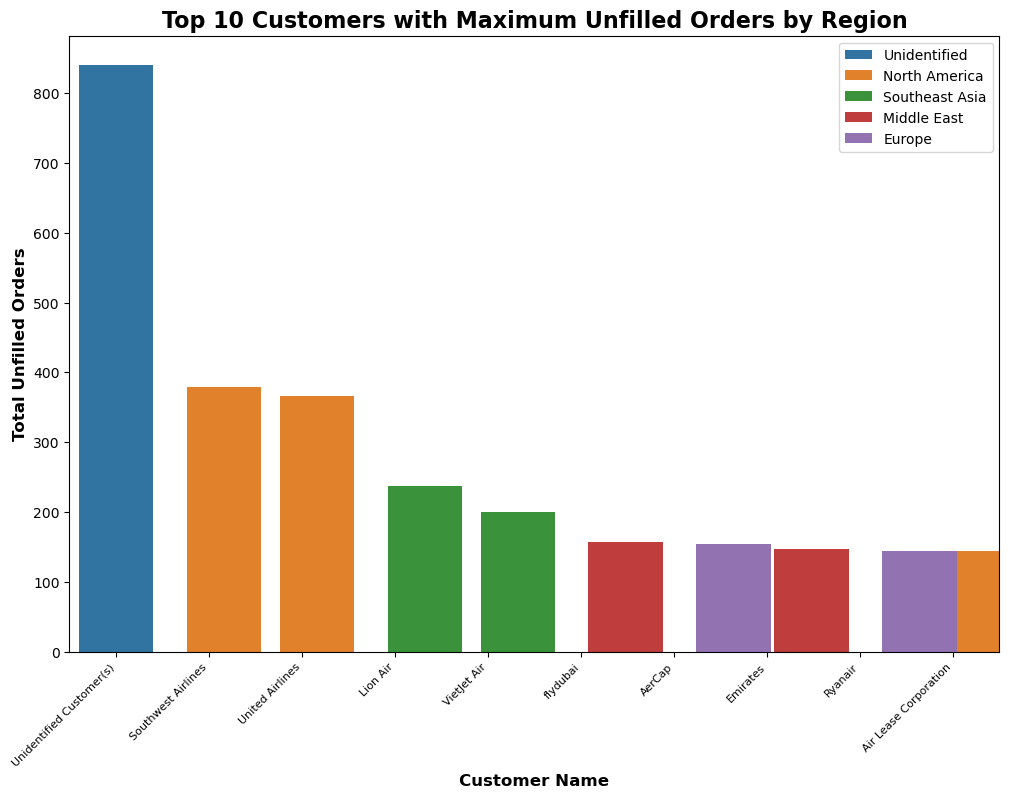

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the CSV file
df = pd.read_csv("OrdersandDeliveries.csv")

# Convert the 'Unfilled Orders' column to numeric format
df['Unfilled Orders'] = pd.to_numeric(df['Unfilled Orders'], errors='coerce')

# Group the data by customer name and region, and calculate the total unfilled orders
unfilled_orders = df.groupby(['Customer Name', 'Region'])['Unfilled Orders'].sum().reset_index()

# Sort the dataframe by 'Unfilled Orders' in descending order and select the top 10 rows
top_10_customers = unfilled_orders.sort_values(by='Unfilled Orders', ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(12, 8))

# Set the width of the bars
bar_width = 0.8

# Plot a bar plot for the total unfilled orders with increased bar width
sns.barplot(data=top_10_customers, x='Customer Name', y='Unfilled Orders', hue='Region', linewidth=5)

# Set the title and labels
plt.title('Top 10 Customers with Maximum Unfilled Orders by Region', fontweight='bold', fontsize=16)
plt.xlabel('Customer Name', fontweight='bold', fontsize=12)
plt.ylabel('Total Unfilled Orders', fontweight='bold', fontsize=12)

# Rotate and align the x-axis labels
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(top_10_customers['Customer Name'])

# Adjust the font size of x-axis labels
plt.tick_params(axis='x', labelsize=8)

# Set the legend position and size
plt.legend(loc='upper right', fontsize='medium')

# Set the width of the bars
for patch in plt.gca().patches:
    patch.set_width(bar_width)

# Display the plot
plt.show()


# ** Interpretation**
Above bar chart shows the name of the customers with highest unfilled orders. To get more info we can go deeper into the reason for unfilled orders to increase the sales


# **Findings**
*The United States stands out as the top contributor in terms of business, with the highest number of deliveries compared to other countries.

*PW engines are in high demand, as they received the highest number of orders.

*In 2018, South Asia emerged as the region with the maximum number of orders, while in 2014, the Middle East region took the lead.

*Southwest Airlines has the highest number of unfilled orders among all airlines.